<a href="https://colab.research.google.com/github/0817LUYan/0817LUYan.github.io/blob/main/cee690_hw4_YanLu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

CEE 690: Machine Learning and Data Science, Fall 2023

Homework 4: 100 Total Points

Due: November 8th by 11:59 PM

Submissions required electronically through Sakai **as an HTML and
as an .ipynb**


A pdf of the homework assignment can be found on Sakai. Please make your own copy of this notebook template and record each answer in it. When you have completed the assignment, save this notebook as an HTML and submit it to Sakai.   

Note that partial credit for incorrect answers is difficult to grant if you do not show your work and comment your code.

# Imports and Setup

In [16]:
import nbconvert
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [17]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.
# For now this is just numpy, which is our linear algebra library
import numpy as np

# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "12"

# makes the directory if it doesn't exist.
import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.')

# a simple defined helper function.
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

Figure directory didn't exist, creating now.


### (Colab specific) Mount your drive

We need to mount Google Drive. This will allow us to import our own modules (from .py files) and to access data (.csv files, etc) on our google drive.

**Run** the next cell to start the mount process. Click on the link that it prints.

You will receive a Google account sign-in prompt. If you have multiple Google accounts (e.g. Duke and personal), make sure to **sign into the same account** that you have the template saved in.

You will need to grant Colab permissions.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Make sure the above output you receive says,

```
Mounted at /content/drive
```
instead of an error message.



### (Colab specific) Adding the path to files

You will need to add this template's path in your Google Drive to the python path.

Click on File$\rightarrow$Locate in Drive, and take a look at where you have saved the template.  You'll need to click on any `...` to see intermediate folders for the full directory structure to get the explicit path.

**Replace the definition** of `GOOGLE_PATH_AFTER_MYDRIVE` below with yours.

In [3]:
import os            ##  This module is for "operating system" interfaces
import sys           ##  This module is for functionality relevant to the python run time

GOOGLE_PATH_AFTER_MYDRIVE = 'CEE690'
GOOGLE_DRIVE_PATH = os.path.join('drive','My Drive', GOOGLE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

# Append the directory path of this notebook to what python easily "sees"
sys.path.append(GOOGLE_DRIVE_PATH)

# Make your current working directory the directory path of this notebookand data
os.chdir(GOOGLE_DRIVE_PATH)

['hw3_physio.csv', '12', 'cee690_hw3_template.html', 'cee690_hw3_template.ipynb', 'cee60_hw4_q4', 'cee690_hw4_template.ipynb']


The above should have printed out a list corresponding to the files that you uploaded to the same google drive folder as this .ipynb file.


Note - if you run the cell above repeatedly without restarting the runtime (e.g. Runtime --> Restart and Run all), you will end up re-appending to the path name and will change directory to a non-existent path.

You will then end up with a

```
FileNotFoundError
```



# Problem 1: Capturing Non-Linearities (20 points)


## Part a

Linear models assume a linear relationship between the input features and the outputs,a linear model can be represented asY=aX+b.

XOR takes '+' and '-' (binary)  as input and produces a binary output. The XOR function returns + if the number of 1s in the input is negative, and it returns - if the number of 1s is positive, it returns + if the inputs are different and - if they are the same, XOR is not linearly separable.

Linear model has a decision boundary that would be a straight line or some hyperplane in higher dimensions and can separates the positive and negative outcomes. The linear model can only draw straight lines to separate the data, so in this instance it cannot capture the relationship where a positive output occurs for both negative inputs(input'-' and input'-' and output '+'). The linear model can only create regions where one side is positive and the other side is negative, it doesn't match the XOR.

## Part b

|--- X1 <= 0.00
|   |--- X2 <= 0.00
|   |   |--- class: 1
|   |--- X2 >  0.00
|   |   |--- class: -1
|--- X1 >  0.00
|   |--- X2 <= 0.00
|   |   |--- class: -1
|   |--- X2 >  0.00
|   |   |--- class: 1



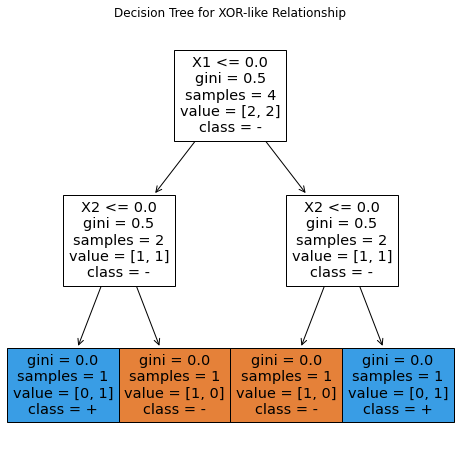

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text

# Define
X = [
    ["-1", "-1"],
    ["-1", "1"],
    ["1", "-1"],
    ["1", "1"]
]

y = [
    "1",
    "-1",
    "-1",
    "1"
]

# DecisionTreeClassifier and fit
clf = DecisionTreeClassifier()
clf.fit(X, y)

#plot tree rules
tree_rules = export_text(clf, feature_names=["X1", "X2"])
print(tree_rules)

# Plot the decision tree
plt.figure(figsize=(8, 8))
plot_tree(clf, filled=True, feature_names=["X1", "X2"], class_names=["-", "+"])
plt.title("Decision Tree for XOR-like Relationship")
plt.show()

The root node is feature X1.

If X1 is positive, the tree follows the left branch and checks the value of X2. If X2 is negative, it predicts a positive outcome (Y+), and if X2 is positive, it predicts a negative outcome (Y-).

If X1 is negative, the tree follows the right branch, if X2 is positive, it predicts a negative outcome (Y-), and if X2 is negative, it predicts a positive outcome (Y+).

## Part c

**k-Nearest Neighbors (kNN):**

kNN is a case-based learning algorithm, and it classifies data points based on the majority class among their k-nearest neighbors in the space. In XOR relationship, KNN would not perform well because the XOR data points are not linearly separable, and kNN relies on distance metrics to make decisions. We need to choose an appropriate value of k and possibly transform the input features to make kNN effective for such data. Probobaly use a smaller k to capture the local relationships but non-linear data will bother KNN a lot.

**Kernel Support Vector Machine (SVM):**

Kernel SVM can capture non-linear relationships effectively.SO in XOR relationship, we can use a kernel SVM with an suitable kernel to transform the data into a higher-dimensional space where it becomes linearly separable, the SVM can find a hyperplane that effectively separates the classes. Since Kernel SVM is well-suited for capturing complex non-linear relationships, it is a good choice for XOR.

## Part d

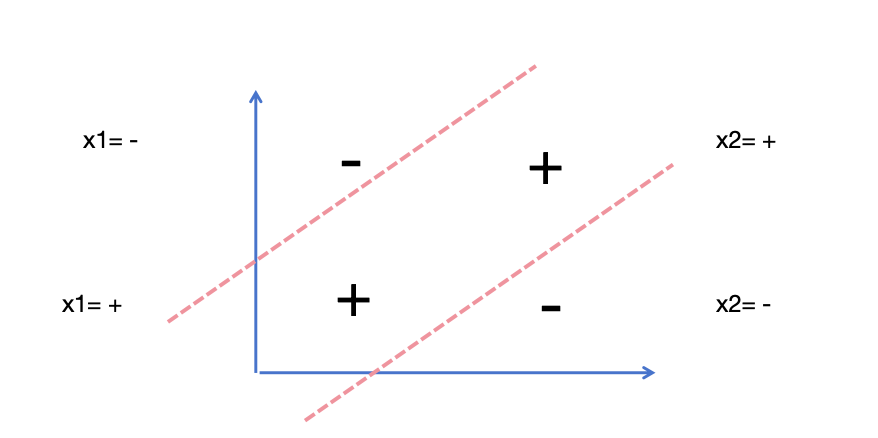

We can use a **2-layer MLP network:**
--Input layer with 2 nodes (for X1 and X2)
--Hidden layer with 2 nodes
--Output layer with 1 node (to predict the XOR result)

1.Input Layer: Has two nodes, which correspond to the two binary input features X1 and X2. The input values are fed forward through the network.

2.Hidden Layer: The hidden layer consists of two nodes with sigmoid activation functions and will learn non-linear transformations of the input data. So they can learn to create features or representations that help in separating the XOR. The non-linearity of the sigmoid activation functions makes the network to capture complex relationships between the XOR inputs.

3.Output Layer: The output layer has a single node with a sigmoid activation function. It takes the weighted and transformed input from the hidden layer and produces an output. The output is used to predict the XOR result, either 0 or 1.

4.Training: During the training process, the network adjusts the weights of the connections between nodes to minimize the error between its predictions and the actual XOR values in the training data. By updating these weights the MPL network can learn to approximate the XOR function.

I think the key points is that the non-linearity introduced by the sigmoid activation functions in the hidden layer allows the MLP to capture the XOR relationship, which is not linearly separable. The hidden layer learns to create a decision boundary that can separate the XOR classes effectively, making it a suitable architecture for solving this problem.

# Problem 2: Performing deep learning by hand (20 points)

## Part a

**Neuron 1:**

h1 = ReLU(0.2⋅0.6+0.4⋅0.2+0.1⋅0.8+0.3⋅0.1+0.1)

h1 = ReLU ( 0.12 + 0.08 + 0.08 + 0.03 + 0.1 )

h1 = ReLU ( 0.41 )

**Neuron 2:**

h2 =ReLU(0.3⋅0.6+0.1⋅0.2+0.2⋅0.8+0.5⋅0.1+0.2)
h2 = ReLU ( 0.18 + 0.02 + 0.16 + 0.05 + 0.2 )
h2 = ReLU ( 0.61 )

**Neuron 3:**

h3 =ReLU(0.5⋅0.6+0.2⋅0.2+0.3⋅0.8+0.4⋅0.1+0.3)
h3 = ReLU(0.3+0.04+0.24+0.04+0.3)
h3 = ReLU ( 0.92 )


so the output from the hidden layer H will be

H = [h1, h2, h3] = [0.41,0.61,0.92]



## Part b

I think ReLU plays a crucial role in the hidden layers of a MLP because:

--ReLU gives non-linearity into the network. If we don't have that, no matter how many layers it had, it would still be equivalent to a linear model, because the composition of linear functions is itself a linear function. But non-linearity allows the network to model complex relationships between inputs and outputs, while linear models cannot.


--When compared to other activation functions like sigmoid, ReLU is really computationally efficient, cuz it involves much simpler mathematical operations. This can be especially beneficial when we are training large networks.

--ReLU provides sparse activation that can make any input less than zero, the output is zero. That means only a subset of neurons is activated at any time. since there is a sparse interaction then reduced computational load.

## Part c

**Impact:**

--Model Complexity Increased: If we have more neurons in a hidden layer, it allows the network to capture more complex relationships and interactions between features.


--Flexibility: The network has more parameters when more neurons provided, I mean the weights and biases in the model, giving it the flexibility to fit a wider variety of shapes in the decision boundary within the feature space.

**Trade-offs:**


--Overfitting: Sometimes the model learns the noise in the training data too well and performs poorly on unseen data, so even though we add more neurons and it can help the model to learn more complex patterns, sometimes they can also lead to overfitting.

--Computation: If we add too many neurons, they might increase the computational cost. Then training becomes slower because there are more parameters and calculations for each forward and backward pass.

--Generalization: If a model with fewer neurons, it is less likely to overfit the training data and may generalize better to unseen data. But if the model is too simple, it will not perform well even on new data.


## Part D

the outputs from the hidden layer H = [0.41, 0.61, 0.92]

the output neuron's weights = [0.3, 0.5, 0.2]

the output neuron bias = 0.1.

Y = (0.3 * 0.41) + (0.5 * 0.61) + (0.2 * 0.92) + 0.1


Y = 0.123 + 0.305 + 0.184 + 0.1


Y = 0.712

So the final output Y is 0.712.

# Problem 3: Using PyTorch on MNIST (30 Points)

Code to access the MNIST dataset

In [ ]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X_mnist, y_mnist = mnist.data, mnist.target.astype(int)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

## Part a

In [3]:
class MNIST_Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, x):
        return self.lin(x)


## Training
epochs=5

# Instantiate model
model = MNIST_Logistic_Regression()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Iterate through train set minibatchs
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        x = images.view(-1, 28*28)
        y = model(x)
        loss = criterion(y, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

## Part b

In [5]:
# Define the MLP with a single hidden layer
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)  # First layer input 28*28=784, output 128 (hidden layer size)
        self.fc2 = nn.Linear(128, 10)   # Second layer input 128 (hidden layer size), output 10 (number of classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

## Part c

In [6]:
# Define the MLP with two hidden layers
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)  # First hidden layer with 256 nodes
        self.fc2 = nn.Linear(256, 128)  # Second hidden layer with 128 nodes
        self.fc3 = nn.Linear(128, 10)   # Output layer with 10 nodes (number of classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU activation function after first hidden layer
        x = F.relu(self.fc2(x))  # ReLU activation function after second hidden layer
        x = self.fc3(x)          # Output layer, no activation here (it will be included in the loss)
        return x

# Instantiate
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

## Part d

**validation accuracy for logistic regression network**

In [7]:
class MNIST_Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, x):
        return self.lin(x)


## Training
epochs=5

# Instantiate model
model = MNIST_Logistic_Regression()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Iterate through train set minibatchs
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        x = images.view(-1, 28*28)
        y = model(x)
        loss = criterion(y, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9194999933242798


**validation accuracy for MLP with a single layer**

In [8]:
# Define the MLP with a single hidden layer
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)  # First layer input 28*28=784, output 128 (hidden layer size)
        self.fc2 = nn.Linear(128, 10)   # Second layer input 128 (hidden layer size), output 10 (number of classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Applying ReLU activation function to the hidden layer
        x = self.fc2(x)         # Output layer, no activation (CrossEntropyLoss applies Softmax)
        return x

# Instantiate the model
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

# Testing loop
correct = 0
total = len(mnist_test)

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Forward pass
        outputs = model(images)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total
print('Test accuracy: {}'.format(accuracy))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9578


**validation accuracy for MLP with a two layer**

In [9]:
# Define the MLP with two hidden layers
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)  # First hidden layer with 256 nodes
        self.fc2 = nn.Linear(256, 128)  # Second hidden layer with 128 nodes
        self.fc3 = nn.Linear(128, 10)   # Output layer with 10 nodes (number of classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU activation function after first hidden layer
        x = F.relu(self.fc2(x))  # ReLU activation function after second hidden layer
        x = self.fc3(x)          # Output layer, no activation here (it will be included in the loss)
        return x

# Instantiate the model
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

# Testing loop
correct = 0
total = len(mnist_test)

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Forward pass
        outputs = model(images)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total
print('Test accuracy: {}'.format(accuracy))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9697


The validation accuracy for logistic regression network is 0.9194999933242798


The validation accuracy for an MLP with a single hidden layer is 0.9578

The validation accuracy for an MLP with a two hidden layer is 0.9697

The validation accuracy of MPL is higher than that of logistic regression network's.

**Modify the MPL with single layer with nodes = 256**

In [10]:
# Define the MLP with a single hidden layer
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)  # First layer input 28*28=784, output 128 (hidden layer size)
        self.fc2 = nn.Linear(256, 10)   # Second layer input 128 (hidden layer size), output 10 (number of classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Applying ReLU activation function to the hidden layer
        x = self.fc2(x)         # Output layer, no activation (CrossEntropyLoss applies Softmax)
        return x

# Instantiate the model
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

# Testing loop
correct = 0
total = len(mnist_test)

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Forward pass
        outputs = model(images)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total
print('Test accuracy: {}'.format(accuracy))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9602


**Modify the MPL with two layer with 1st layer nodes = 512, second layer nodes = 256**

In [11]:
# Define the MLP with two hidden layers
class MNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)  # First hidden layer with 256 nodes
        self.fc2 = nn.Linear(512, 256)  # Second hidden layer with 128 nodes
        self.fc3 = nn.Linear(256, 10)   # Output layer with 10 nodes (number of classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU activation function after first hidden layer
        x = F.relu(self.fc2(x))  # ReLU activation function after second hidden layer
        x = self.fc3(x)          # Output layer, no activation here (it will be included in the loss)
        return x

# Instantiate the model
model = MNIST_MLP()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in range(epochs):
    for images, labels in tqdm(train_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

# Testing loop
correct = 0
total = len(mnist_test)

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        # Flatten the image from [100, 1, 28, 28] to [100, 784]
        images = images.view(images.shape[0], -1)

        # Forward pass
        outputs = model(images)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total
print('Test accuracy: {}'.format(accuracy))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Test accuracy: 0.9723


The results match my reported accuracies, whihc is 91% for logistic regression, ~96-98% for MLP, Changing the number of nodes in the hidden layer will cause impact on model's holdout performance. I consider it from two sides:

**Increasing the Number of Nodes:**

--Model Capacity: Increasing the number of nodes increases the model's capacity so it can learn more complex patterns in the data.

--Overfitting Risk: But here is a higher risk of overfitting with more nodes,the model may start to learn noise that do not generalize to the holdout data.

--Computationally Intensive: A longer training time might be needed when we train a model with more nodes becaue we have more parameters,  and this require more computational resources.

**Decreasing the Number of Nodes:**

--Reduced Capacity: Decreasing the number of nodes reduces the model's capacity can lead to underfitting, cuz the model might become too simple to capture the underlying patterns in the data.

--Generalization: But a smaller model with fewer nodes might generalize better to holdout data if the original model was overfitting. This is because the model is forced to learn only the most prominent features of the data.

--Training Efficiency up: The model will have fewer parameters with fewer nodes, then reduce the training time and computational resources required.


So I think we need to find the right Balance, we could use techniques like cross-validation to determine the best model



# Problem 4:  AlexNet the deep learning firefighter (25 points)


In [45]:
import imageio
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
import torchvision.models as models
import os
# from torchsummary import summary
from tqdm.notebook import tqdm, trange
import PIL
%matplotlib inline
import torchvision
from PIL import Image
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
# from torchsummary import summary
from tqdm.notebook import tqdm, trange

## Part a

<ipython-input-46-684f56c5a5b8>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread('./cee60_hw4_q4/Testing/fire/' + fire[0]))
<ipython-input-46-684f56c5a5b8>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread('./cee60_hw4_q4/Testing/nofire/' + nofire[0]))


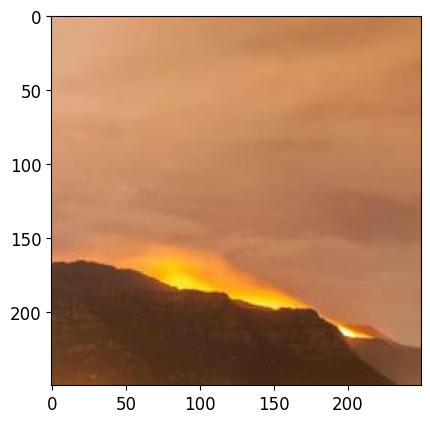

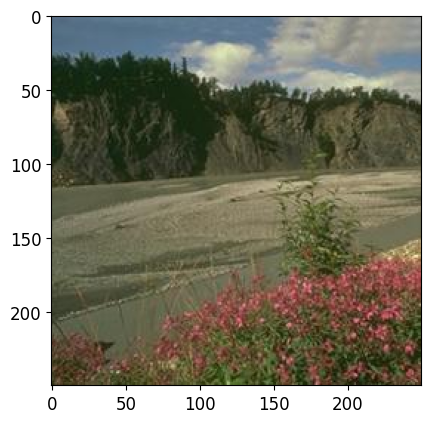

In [46]:
# Let's display a sample image for each class
# ant_ims = os.listdir('./ants_vs_bees/train/ants/')
fire=os.listdir('./cee60_hw4_q4/Testing/fire/')
nofire=os.listdir('./cee60_hw4_q4/Testing/nofire/')
# bee_ims = os.listdir('./ants_vs_bees/train/bees/')
plt.figure()
plt.imshow(imageio.imread('./cee60_hw4_q4/Testing/fire/' + fire[0]))
plt.figure()
plt.imshow(imageio.imread('./cee60_hw4_q4/Testing/nofire/' + nofire[0]))
plt.show()

## Part b

In [47]:
data_transforms_test = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [48]:
train_data = datasets.ImageFolder('./cee60_hw4_q4/Training and Validation', transform=data_transforms)
test_data = datasets.ImageFolder('./cee60_hw4_q4/Testing', transform=data_transforms_test)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True,num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=False,num_workers=0)

## Part c

In [ ]:
# model_notrain = models.alexnet()

model_ft = models.alexnet(pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device) #send the model to the gpu if we have one

model_ft

In [50]:
num_ftrs = model_ft.classifier[-1].in_features # Need to know the number of features
# coming out of the penultimate layer
model_ft.classifier[-1] = nn.Linear(num_ftrs, 1)

model_ft = model_ft.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_ft.parameters(), lr=1e-5, momentum=0.9)

In [51]:
def train_model(model, criterion, optimizer, num_epochs=25):
    for epoch in trange(num_epochs):
        correct = 0
        total = len(train_data)
        for images, labels in tqdm(train_loader):

            inputs = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # Do the forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            predictions = torch.round(torch.sigmoid(outputs)).long()#torch.argmax(y, dim=1)
            correct += torch.sum((predictions == labels).float())

            # Calculate gradients and step
            loss.backward()
            optimizer.step()
        test_model()

        print('Train accuracy: {}'.format(correct/total))

        model_ft.train() # set model back to training mode (batch norm layers back to normal) after testing  In [16]:


In [52]:
def test_model():
    ## Testing
    correct = 0
    total = len(test_data)
    model.eval() # set the model into evaluation mode, which changes the
    # behavior of the batch norm layer so that it is not sensitive to batch size
    with torch.no_grad():
        # Iterate through test set minibatchs
        for images, labels in tqdm(test_loader):
            # Forward pass
            inputs = images.to(device)
            labels = labels.unsqueeze(1).to(device)
            y = model_ft(inputs)

            predictions = torch.round(torch.sigmoid(y)).long()#torch.argmax(y, dim=1)
            correct += torch.sum((predictions == labels).float())
    print('Test accuracy: {}'.format(correct/total))

In [53]:
train_model(model_ft, criterion, optimizer, num_epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.9264705777168274
Train accuracy: 0.8722707629203796


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.9705882668495178
Train accuracy: 0.9667030572891235


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.9705882668495178
Train accuracy: 0.9748908281326294


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.9705882668495178
Train accuracy: 0.9808952212333679


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.9558823704719543
Train accuracy: 0.9748908281326294


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.9705882668495178
Train accuracy: 0.9787117838859558


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.9705882668495178
Train accuracy: 0.9792576432228088


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.9705882668495178
Train accuracy: 0.9792576432228088


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.9558823704719543
Train accuracy: 0.9803493618965149


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.9558823704719543
Train accuracy: 0.981441080570221


## Part d

In [ ]:
model_ft = models.alexnet(pretrained=False)
num_ftrs = model_ft.classifier[-1].in_features # Need to know the number of features
# coming out of the penultimate layer
model_ft.classifier[-1] = nn.Linear(num_ftrs, 1)
model_ft = model_ft.to(device)
optimizer = torch.optim.SGD(model_ft.parameters(), lr=1e-5, momentum=0.9)

In [55]:
train_model(model_ft, criterion, optimizer, num_epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.6029411554336548
Train accuracy: 0.48853713274002075


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.6617646813392639
Train accuracy: 0.4879912734031677


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.5735294222831726
Train accuracy: 0.47980350255966187


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.6029411554336548
Train accuracy: 0.47434499859809875


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.5441176295280457
Train accuracy: 0.4967249035835266


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.6323529481887817
Train accuracy: 0.49563318490982056


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.5735294222831726
Train accuracy: 0.49890831112861633


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.6323529481887817
Train accuracy: 0.48689958453178406


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.6323529481887817
Train accuracy: 0.4978165924549103


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Test accuracy: 0.5147058963775635
Train accuracy: 0.4929039478302002


## Part e

**With Transfer Learning (Pretrained AlexNet):**

Average Test accuracy: ~95.59%

Average Train accuracy: ~98.14%

We started with AlexNet which had been pre-trained on a large dataset, we have achieved very high classification accuracies. It's obvious that the features learned by the network on the original dataset are general enough to be good. I think the slight difference between train and test accuracy suggests that the model has generalized well to unseen data without overfitting significantly.

**Without Transfer Learning (AlexNet from Scratch):**

Average Test accuracy: ~63.24%

Average Train accuracy: ~49.78%

Training AlexNet has lower accuracies. The training accuracy is quite low means that the model has not learned to fit the training data very well, It might be caused by insufficient data, inadequate training time. The test accuracy is still much lower than the pre-trained part.

**Comments:**

--The results tell us that transfer learning can significantly improve the performance of neural networks, especially when the available training data is limited or the network is complex and requires a lot of computational resources to train from scratch. The pretrained network has already learned a rich set of features and it can be applied to new tasks with only minimal fine-tuning.

--The pretrained AlexNet has generalized very very well to new data.

--But if the dataset is small or not diverse enough, training from scratch won't be as effective compared to using a network pre-trained on a large and diverse dataset.

# Pseudo-Problem 5: Administrative (5 Points):

## Part a

14 hours

## Part b

I adhered to the Duke Community Standard in the completion of this assignment.

## Part c

I adhered to the Class AI Policy in the completion of this assignment.

# Convert file to HTML

To generate your HTML file to submit on Sakai, run the following cells with the correct file path.

In [6]:
# If you are working in Colab, use this path to convert.
print(GOOGLE_DRIVE_PATH)

# Otherwise, use the filepath on your computer where this template is saved

drive/My Drive/CEE690


In [7]:
!jupyter nbconvert --to html "/content/drive/MyDrive/CEE690/cee690_hw4_template.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/CEE690/cee690_hw4_template.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 280, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.10/dist-packages/nb